In [1]:
from load_data import load_scaled_data
import pandas as pd
import numpy as np

In [2]:
df = load_scaled_data()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.827377,0.737695,-0.530377,0.432793,-0.473674,-0.502445,0.581114
1,1,-1.566107,-1.355574,0.571831,0.432793,-0.473674,0.786845,-1.938460
2,1,0.827377,-1.355574,-0.254825,-0.474545,-0.473674,-0.488854,0.581114
3,1,-1.566107,-1.355574,0.365167,0.432793,-0.473674,0.420730,0.581114
4,0,0.827377,0.737695,0.365167,-0.474545,-0.473674,-0.486337,0.581114
...,...,...,...,...,...,...,...,...
886,0,-0.369365,0.737695,-0.185937,-0.474545,-0.473674,-0.386671,0.581114
887,1,-1.566107,-1.355574,-0.737041,-0.474545,-0.473674,-0.044381,0.581114
888,0,0.827377,-1.355574,NaN,0.432793,2.008933,-0.176263,0.581114
889,1,-1.566107,0.737695,-0.254825,-0.474545,-0.473674,-0.044381,-1.938460


In [3]:
# Внесение пропусков в случайные места
np.random.seed(42)
for col in ['Age', 'Sex']:
    df.loc[df.sample(frac=0.1).index, col] = np.nan


In [4]:
import DecisionTree
from sklearn.model_selection import train_test_split
from Criterion import Criterions
from sklearn.metrics import accuracy_score


df = load_scaled_data()
# Разделение на X и y
X = np.array(df.drop(columns=['Survived']))
y = np.array(df['Survived'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTree.DecisionTreeClassifier(Criterions.multiClassEntropy, max_depth=7)
tree.fit(X_train, y_train)
predictions = tree.predict(X_val)
print("Predictions:", predictions)
print("True labels:", y_val)
print("Accuracy:", accuracy_score(y_val, predictions))

Predictions: [0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0]
True labels: [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
Accuracy: 0.7877094972067039


In [5]:
tree.prune(X_val, y_val)
predictions2 = tree.predict(X_val).round()
print("Predictions:", predictions2)
print("Accuracy:", accuracy_score(y_val, predictions2))

Predictions: [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
Accuracy: 0.8268156424581006


c:\python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
tree2 = DecisionTree.DecisionTreeClassifier(Criterions.donskoy, max_depth=4)
tree2.fit(X_train, y_train)
predictions3 = tree2.predict(X_val)
print("Predictions:", predictions3)
print("Accuracy:", accuracy_score(y_val, predictions3))

Predictions: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
Accuracy: 0.7988826815642458


In [7]:
from sklearn.tree import DecisionTreeClassifier
# Обучение модели
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

# Оценка точности
y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))


Accuracy: 0.8044692737430168


In [8]:
tree = DecisionTree.DecisionTreeClassifier(Criterions.multiClassEntropy, max_depth=4)
%timeit tree.fit(X_train, y_train)

500 ms ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
clf = DecisionTreeClassifier(criterion='gini')
%timeit clf.fit(X_train, y_train)

3 ms ± 226 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Регрессия

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [11]:
X = np.array(df.drop(columns=['Fare']))
y = np.array(df['Fare'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.4927458459423772


Predictions: [-0.20819048 -0.36937858 -0.45957705 -0.04499686 -0.35866079  1.042637
 -0.45957705 -0.35866079 -0.45957705  2.45020307  0.11706105 -0.45957705
 -0.20819048 -0.45957705 -0.36937858  2.45020307  0.11706105 -0.45957705
 -0.36937858  0.11706105 -0.45957705  0.11706105 -0.35866079 -0.45957705
 -0.45957705 -0.20819048  2.07929827 -0.36937858 -0.20819048 -0.45957705
 -0.45957705 -0.45957705  1.47761165 -0.45957705 -0.45957705 -0.35866079
  0.11706105 -0.45957705  2.07929827 -0.45957705 -0.08447266 -0.35866079
 -0.45957705 -0.45957705 -0.20819048 -0.20819048 -0.45957705 -0.45957705
 -0.45957705  1.41486282 -0.20819048  1.41486282 -0.20819048  2.45020307
 -0.45957705  2.45020307 -0.36937858  1.41486282 -0.36937858 -0.45957705
 -0.45957705 -0.04499686 -0.08447266  0.11706105 -0.45957705 -0.36937858
 -0.36937858 -0.45957705 -0.20819048  0.76131806 -0.04499686  4.6344169
  2.07929827  1.41486282 -0.45957705 -0.35866079 -0.45957705  2.45020307
 -0.36937858 -0.20819048 -0.20819048 -0.3

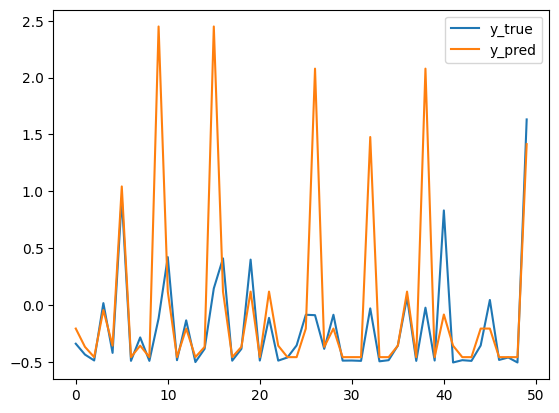

In [16]:
import matplotlib.pyplot as plt

tree = DecisionTree.DecisionTreeRegression(Criterions.mse, max_depth=4)
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
print("Predictions:", predictions)
print("True labels:", y_test)
print("Accuracy:", mean_squared_error(y_test, predictions))

n_sampl = 50
plt.plot(y_test[:n_sampl], label='y_true')
plt.plot(predictions[:n_sampl], label='y_pred')
plt.legend(loc='upper right')
plt.show()